> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city hou  se is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house



# Import standard libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [5]:
import pandas as pd

# Dataset link
df = pd.read_csv("C:/Users/amand/OneDrive/ITU/SUMMER 2025/Applied Ai/05_Exercises/AI25_ex02_regression/USA_Housing.csv")

# General information about the dataset
print(df.describe())

# Normalizing the data 
df_copy = df.drop('Address', axis=1)        # Remove non-numeric 'Address' column

max_vals = df_copy.max()
min_vals = df_copy.min()
df_norm = (df_copy - min_vals) / (max_vals - min_vals)

print("\nNormalized Data:\n", df_norm)

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

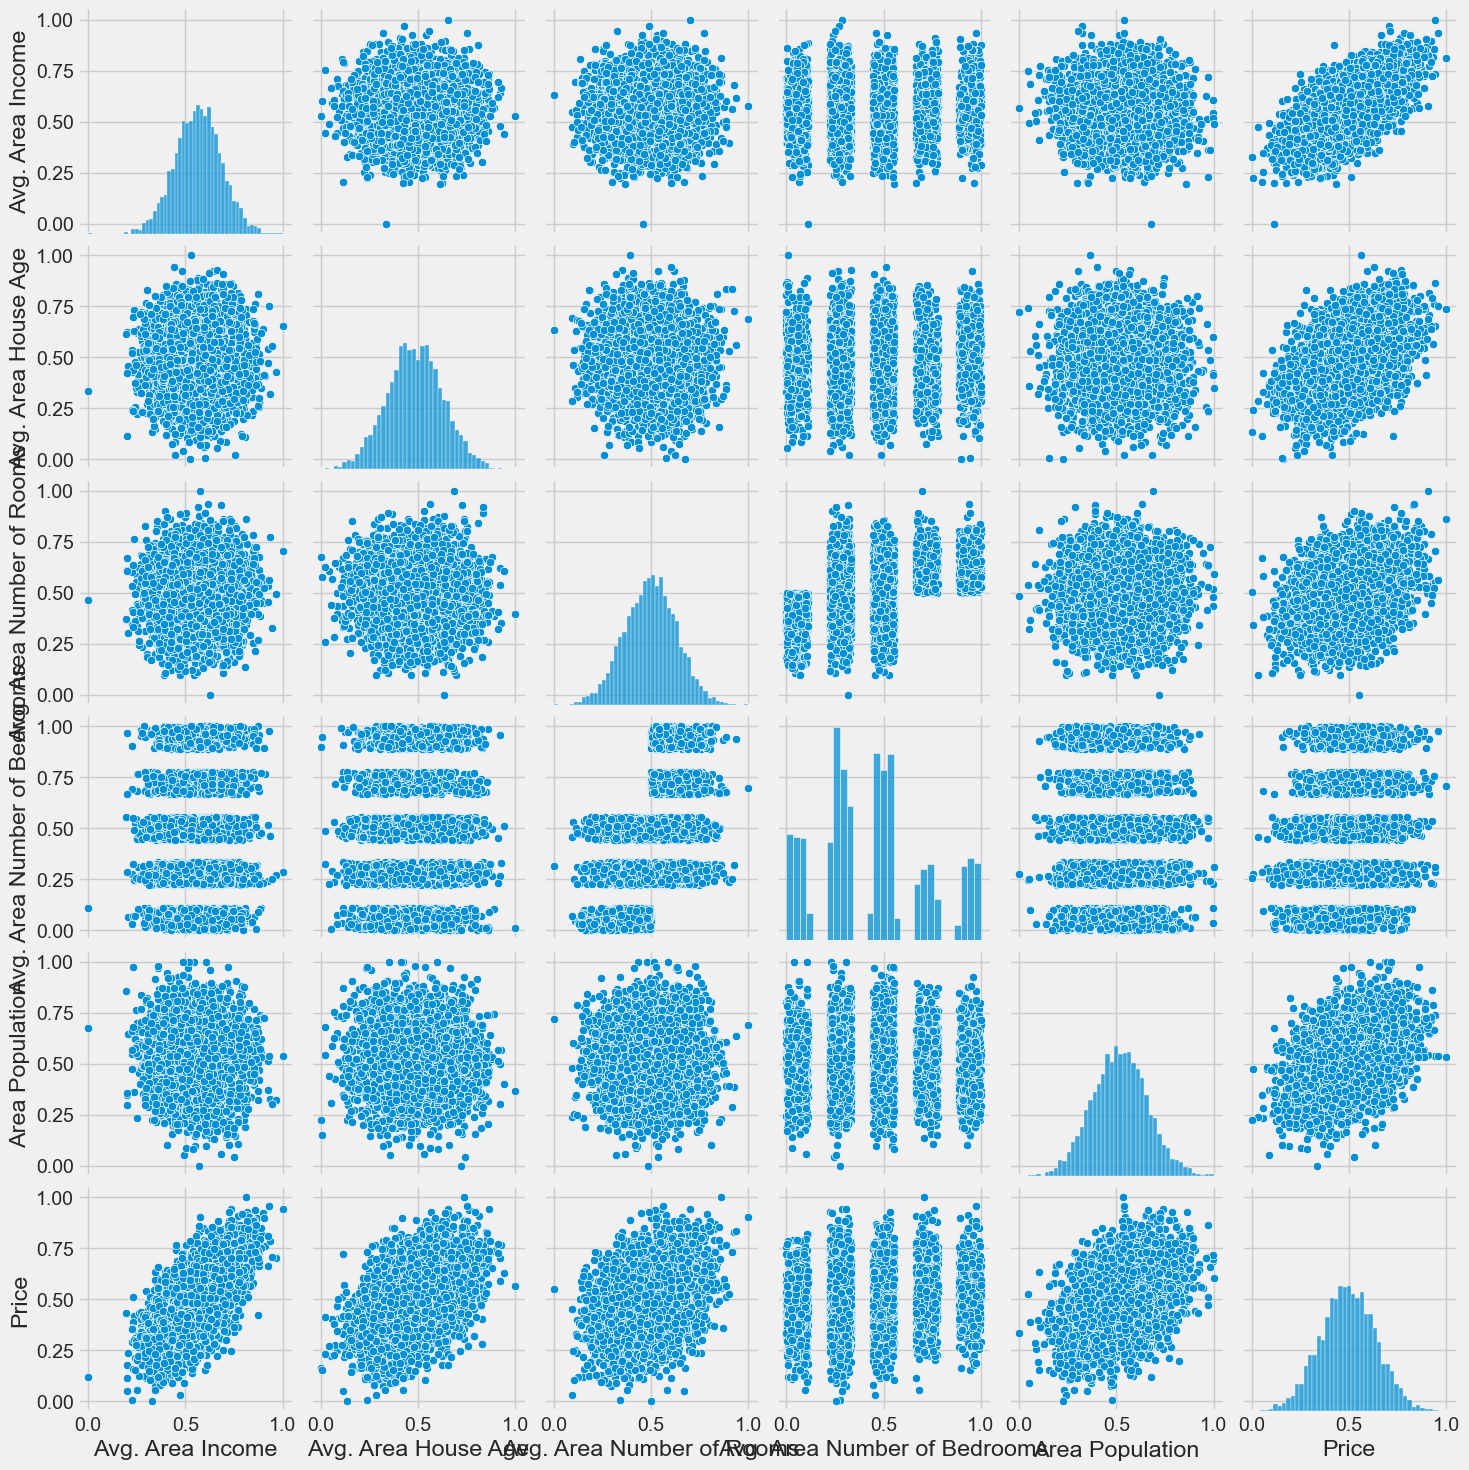

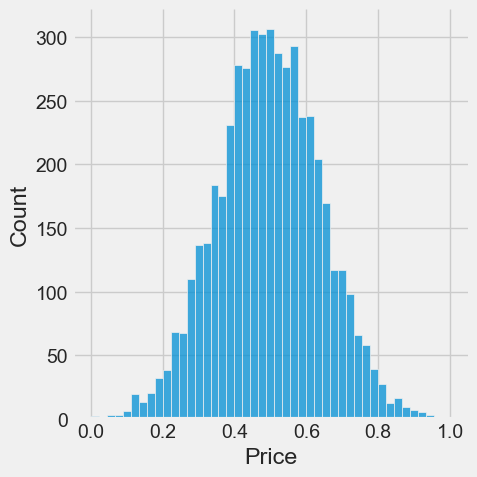

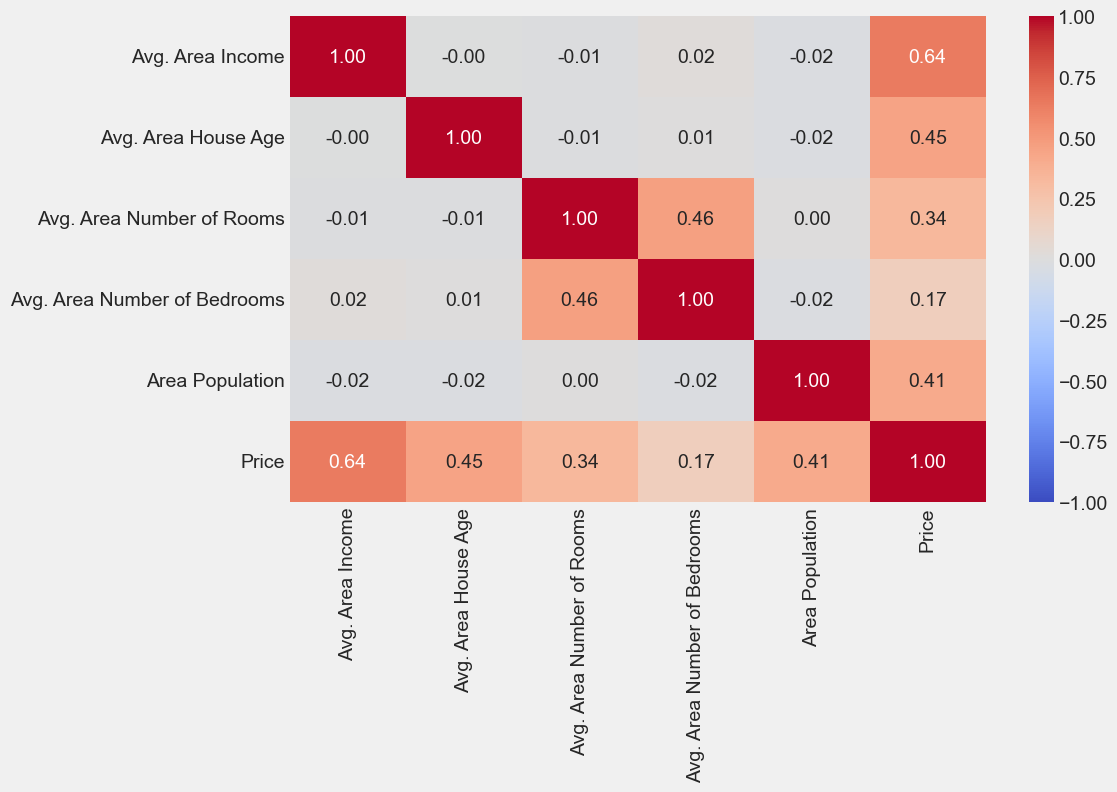

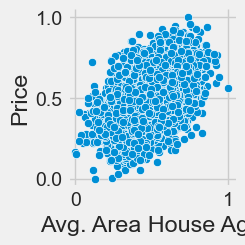

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for the normalized dataset
pairplot = sns.pairplot(data=df_norm)
pairplot.savefig(fname="pairplot_export.jpeg",bbox_inches="tight")

# Plot the distribution of the target variable 'Price'
target_distribution = sns.displot(df_norm["Price"])

# Compute correlation matrix
correlation = df_norm.corr()

# Create a heatmap to visualize correlation strengths between variables
# -- Values close to +1 indicate strong positive and negative relationships, respectively
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f", vmin= -1 , vmax= 1)
plt.savefig(fname="Heat Map.jpeg", bbox_inches="tight")  # Save the heatmap
plt.show()

# Generate a pairplot focusing on the relationship between house age and price
age_price_plot = sns.pairplot(df_norm, x_vars=["Avg. Area House Age"], y_vars=["Price"])
age_price_plot.savefig(fname="Avg.Area House vs Price.jpeg", bbox_inches="tight")


# Training a Linear Regression Model
## X and y arrays


In [7]:
# Drop unecessary data

df_clean = df_norm.drop("Avg. Area Number of Bedrooms", axis = 1)

# Separate the data

Y = df_clean['Price']
X = df_clean.drop ('Price',axis = 1) # axis 1 indicates we are dropping a column.

In [8]:
from sklearn.model_selection import train_test_split as spl

# Split the data using sklearn
X_train, X_eval, Y_train, Y_eval = spl(X,Y,test_size = 0.2 , random_state = 457)

print(X_train.count())
print(X_eval.count())

Avg. Area Income             4000
Avg. Area House Age          4000
Avg. Area Number of Rooms    4000
Area Population              4000
dtype: int64
Avg. Area Income             1000
Avg. Area House Age          1000
Avg. Area Number of Rooms    1000
Area Population              1000
dtype: int64


In [9]:
from sklearn import metrics

def print_evaluate(testdata, predicted):
    mae,mse,rmse,r2_square = evaluate(testdata,predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(testdata, predicted):
    # Fill in the code necessary to calculate these metrics and use this
    # function to print them in the previous function
    mae = metrics.mean_absolute_error(testdata,predicted)
    mse = metrics.mean_squared_error(testdata,predicted)
    rmse = metrics.root_mean_squared_error(testdata,predicted)
    r2_square = metrics.r2_score(testdata,predicted)

    return mae, mse, rmse, r2_square

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Linear Regression

Take the most correlated dependent/independent pair and calculate the `beta` parameters for Simple linear regression.

Use `skitlearn` to fit the linear model and see if your calculation corresponds to what the library did.

Use `skitlearn` to fit the linear model dependent on all independent variables (normalize inputs).

In [11]:
# Perform Linear Regression using SKlearn
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,Y_train) # This calculates B1 and B0 

print ("Slope:", model.coef_)
# For each independent column we have a different line 
print ("Intercept:", model.intercept_)

#Measures the accuracy of the prediction
print("Score", model.score(X_train,Y_train))

Slope: [0.79049181 0.46344647 0.3719557  0.42784773]
Intercept: -0.5828816411242768
Score 0.9168040866257641


## Model Evaluation


Compare the error from models that used only one independent variable vs. the model that used several independent variables. Did we gain anything from including extra independent dimensions?

In [12]:
# Evaluation on the test set
print("Testing set evaluation")
y_pred = model.predict(X_eval)
print_evaluate(Y_eval,y_pred)

# Evaluation on the training set
print("Training set evaluation")
y_test_pred = model.predict(X_train)
print_evaluate(Y_train,y_test_pred)


Testing set evaluation
MAE: 0.031859636686534486
MSE: 0.0015966495513070552
RMSE: 0.039958097443535213
R2 Square 0.9226592326339081
__________________________________
Training set evaluation
MAE: 0.03348835108765189
MSE: 0.001724550674492166
RMSE: 0.04152770971883913
R2 Square 0.9168040866257641
__________________________________


## Predictions from our Model

Tasks:

1.  Take the test data and plot the predicted vs. true value scatter plot.

2.  Plot the histogram of residual values

3.  Make a scatter plot of residuals depending on the predicted value.

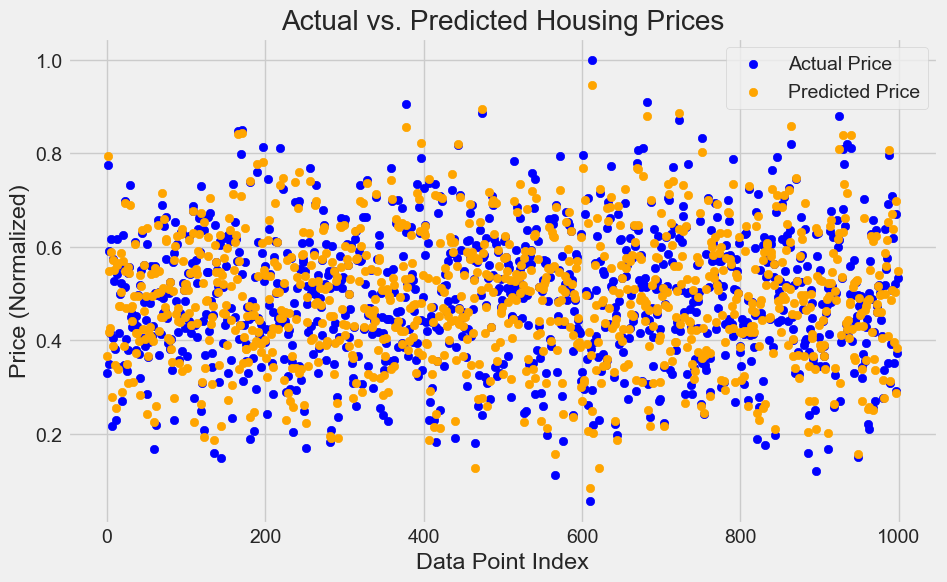

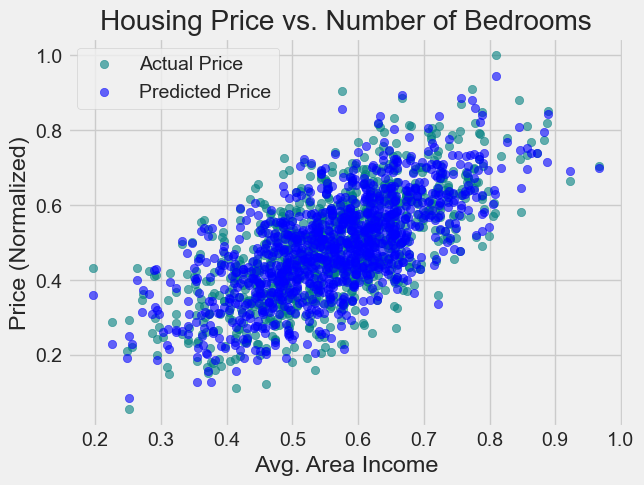

In [13]:
# Actual Price vs Predicted Price 

plt.figure(figsize = (10,6))
plt.scatter (range(len(Y_eval)),Y_eval,color = 'blue', label = 'Actual Price')
plt.scatter (range(len(y_pred)),y_pred,color = 'orange', label = 'Predicted Price')

plt.title("Actual vs. Predicted Housing Prices")
plt.xlabel("Data Point Index")
plt.ylabel("Price (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Relation between Area Income and House price - Actual Price vs Predicted Price 

plt.scatter(X_eval["Avg. Area Income"], Y_eval, alpha=0.6, color="teal",label = 'Actual Price')
plt.scatter(X_eval["Avg. Area Income"], y_pred ,alpha=0.6, color="blue",label = 'Predicted Price')

plt.xlabel("Avg. Area Income")
plt.ylabel("Price (Normalized)")
plt.title("Housing Price vs. Number of Bedrooms")
plt.legend()
plt.grid(True)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2 , include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_regpoly = LinearRegression()
modelpoly= lin_regpoly.fit(X_poly,Y_train) 

#Evaluation on the test set

poly_pred = PolynomialFeatures(degree = 2 , include_bias=False)
X_pred = poly_features.fit_transform(X_eval)

print("Testing set evaluation")
y_pred = modelpoly.predict(X_pred)

mae_poly, mse_poly, rmse_poly, r2_square_poly = evaluate(Y_eval,y_pred)

print("Evaluation Metrics for Polynomial Regression (Degree 2):")
print("Mean Absolute Error (MAE):", mae_poly)
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R2 Score:", r2_square_poly)

# Overall Score - It got a bit more accurate

print("Linear Score", model.score(X_train,Y_train))
print("Polynomial Score", modelpoly.score(X_poly,Y_train))



Testing set evaluation
Evaluation Metrics for Polynomial Regression (Degree 2):
Mean Absolute Error (MAE): 0.031852963505473626
Mean Squared Error (MSE): 0.0015982404561222627
Root Mean Squared Error (RMSE): 0.03997799965133652
R2 Score: 0.9225821701381878
Linear Score 0.9168040866257641
Polynomial Score 0.9169273558514053


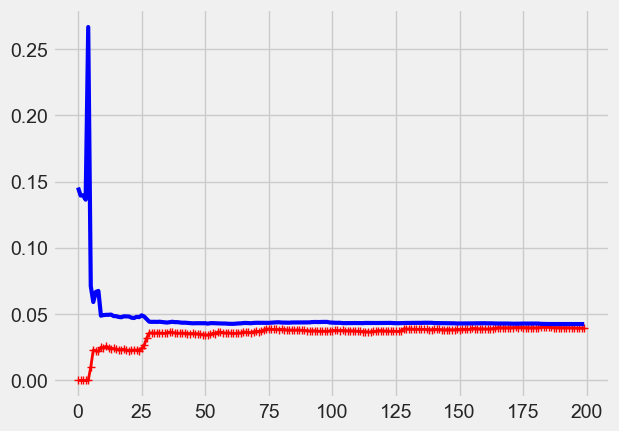

In [24]:
# Learning Curve of the model

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    max_points = 200

    plt.plot(np.sqrt(train_errors[:max_points]), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors[:max_points]), "b-", linewidth=3, label="val")

plot_learning_curves(lin_regpoly,X,Y)